In [1]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import matplotlib as mpl

In [2]:
year = 2023
race = "monaco"

drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

In [11]:
def plot_fastest_lap_brake_visualization(drivers, year, race):

    session = fastf1.get_session(year, race, "Q")
    session.load()

    for driver in drivers:
        lap = session.laps.pick_driver(driver).pick_fastest()
        tel = lap.get_telemetry()

        x = np.array(tel['X'].values)
        y = np.array(tel['Y'].values)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        brake = tel['Brake'].to_numpy().astype(float)

        # Binary map for braking: 0 means no braking, 1 means braking.
        brake_binary = np.where(brake > 0, 1, 0)

        # Set up a colormap with two distinct colors
        cmap = mpl.colors.ListedColormap(['green', 'red'])
        
        lc_comp = LineCollection(segments, norm=plt.Normalize(0, 1), cmap=cmap)
        lc_comp.set_array(brake_binary)
        lc_comp.set_linewidth(4)

        fig, ax = plt.subplots()
        plt.gca().add_collection(lc_comp)
        plt.axis('equal')
        plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

        title = plt.suptitle(f"Fastest Lap Gear Shift Visualization\n"f"{lap['Driver']} - {session.event['EventName']} {session.event.year}")

        cbar = plt.colorbar(mappable=lc_comp, label="Brake", boundaries=[0, 0.5, 1])
        cbar.set_ticks([0.25, 0.75])
        cbar.set_ticklabels(['No Brake', 'Brake'])

        plt.legend(bbox_to_anchor=(1.0, 1.02))

        ax.set_facecolor("black")
        fig.set_facecolor("black")

        mpl.rc('text', color='white')
        mpl.rc('axes', labelcolor='white')
        mpl.rc('xtick', color='white')
        mpl.rc('ytick', color='white')

        plt.tight_layout()
        fig.set_dpi(1000)
        plt.savefig(f"{driver}.png")
        plt.show()


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


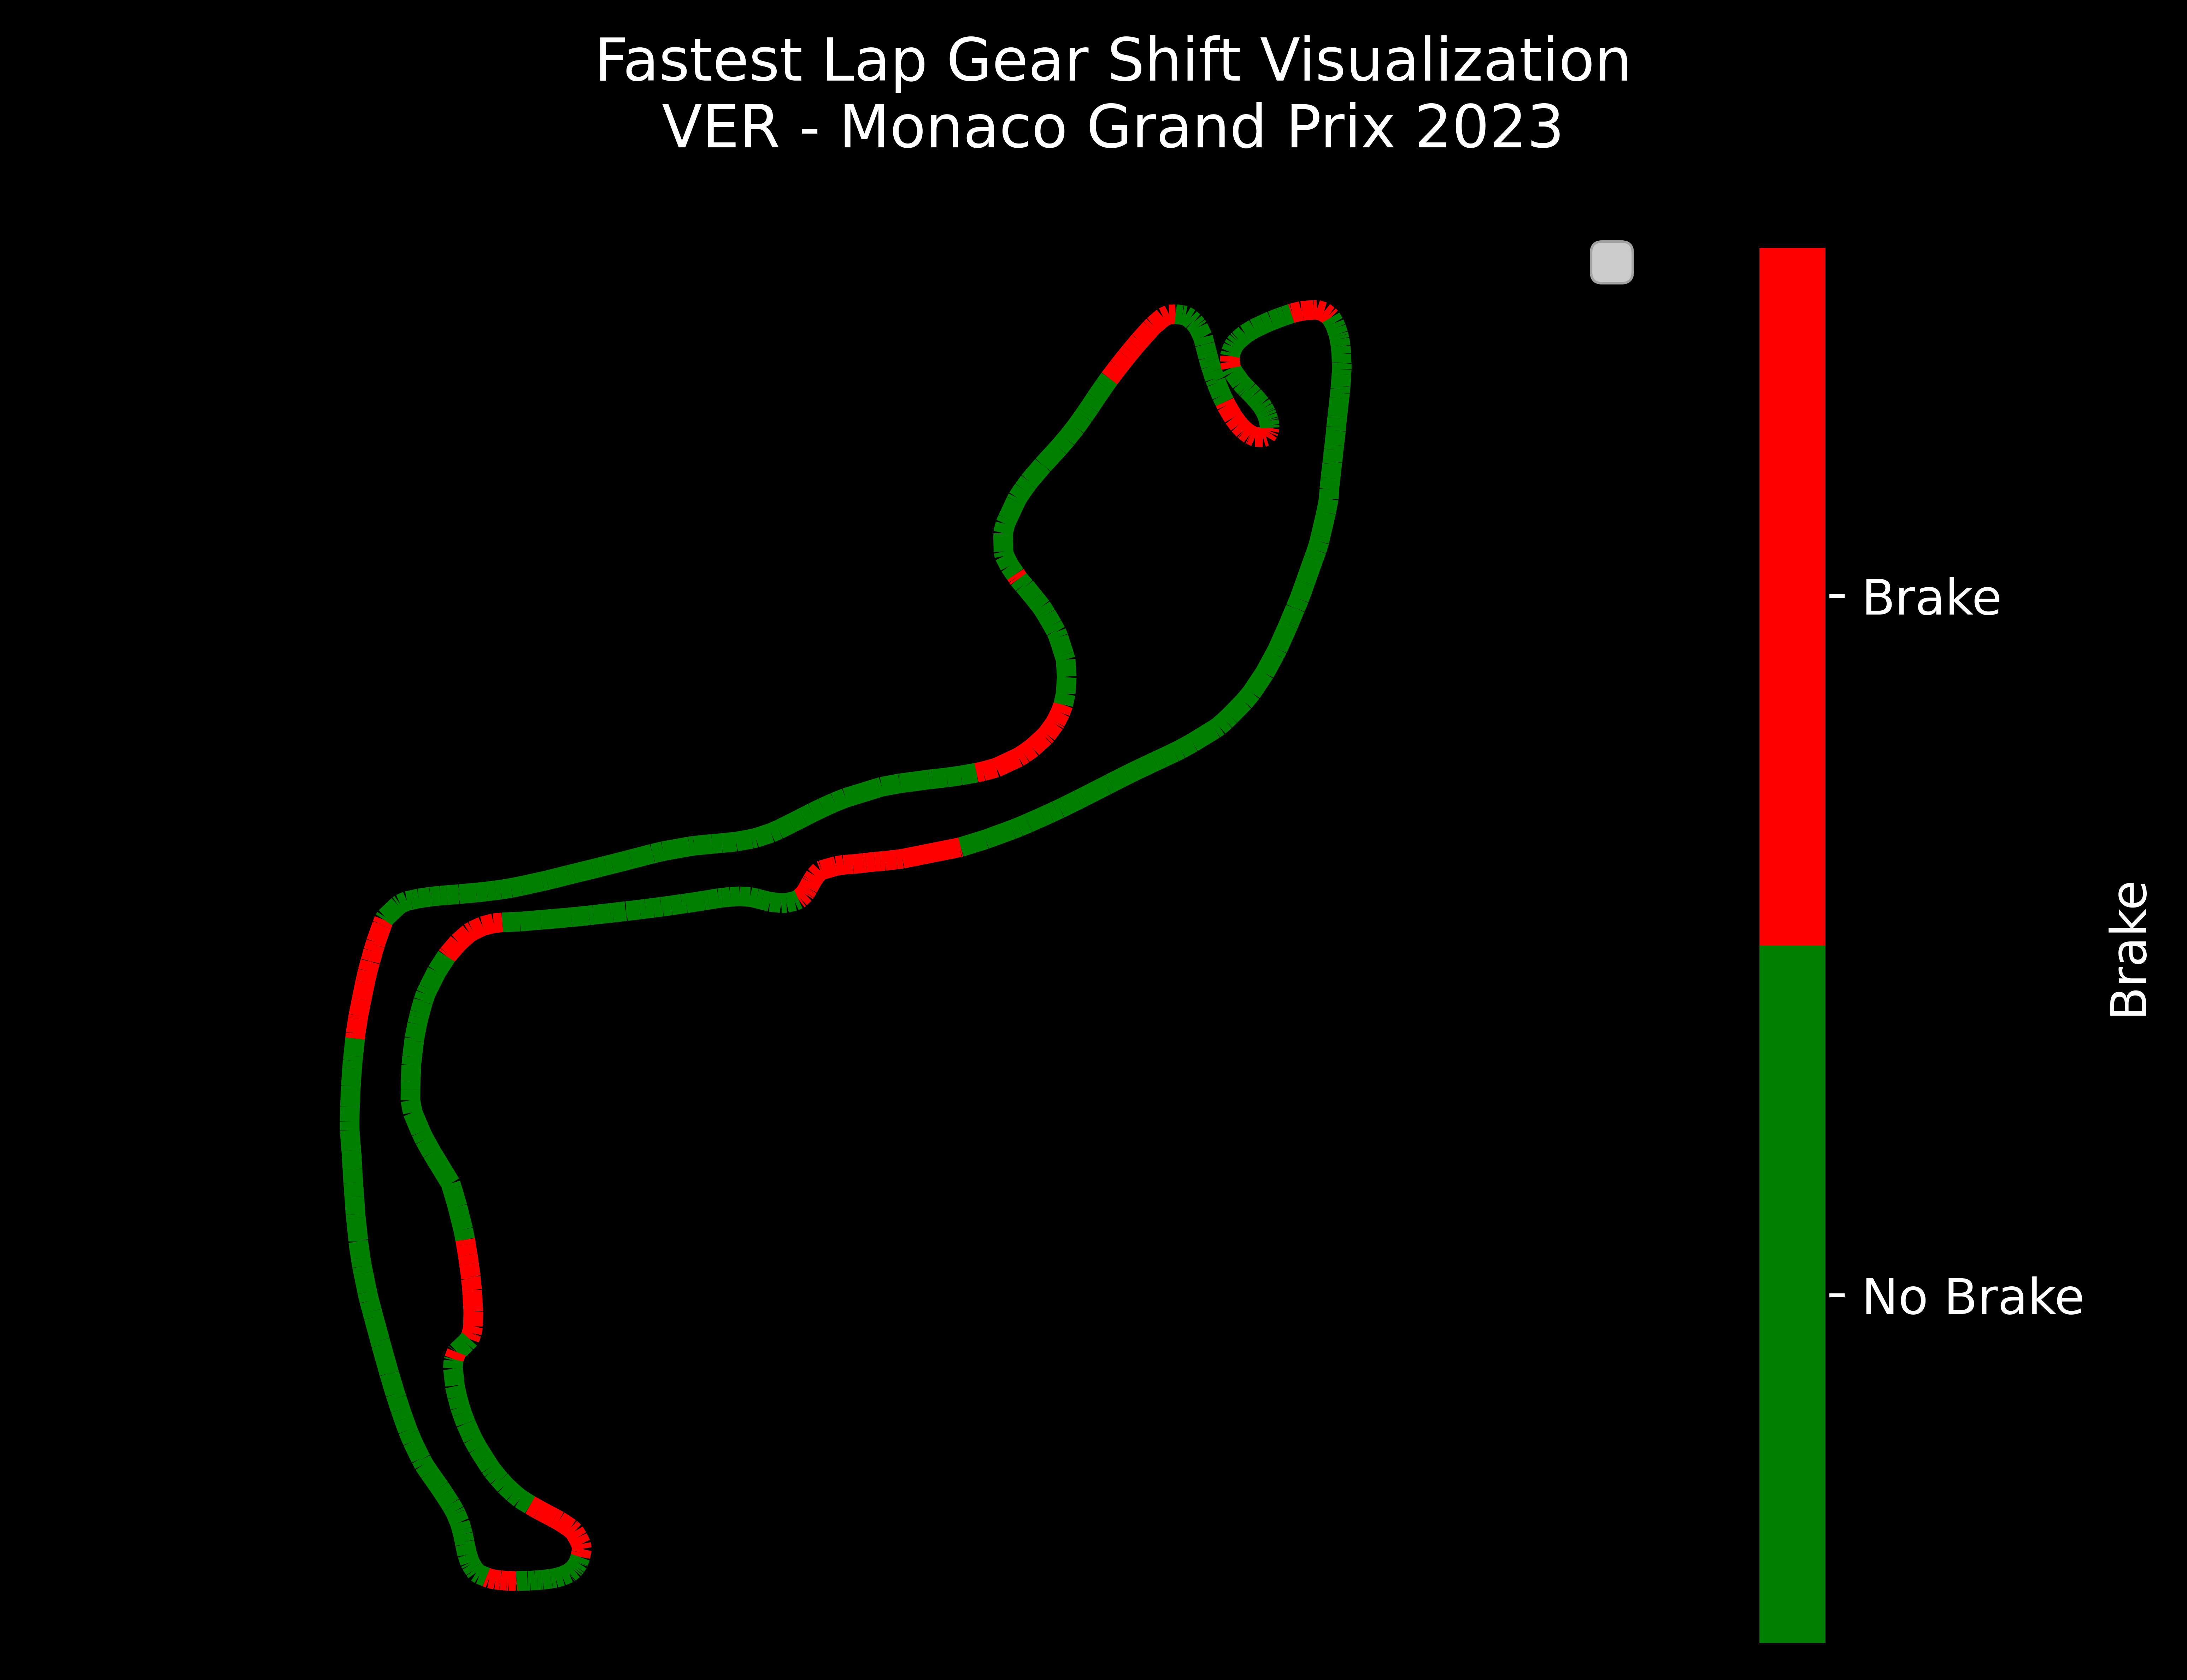

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


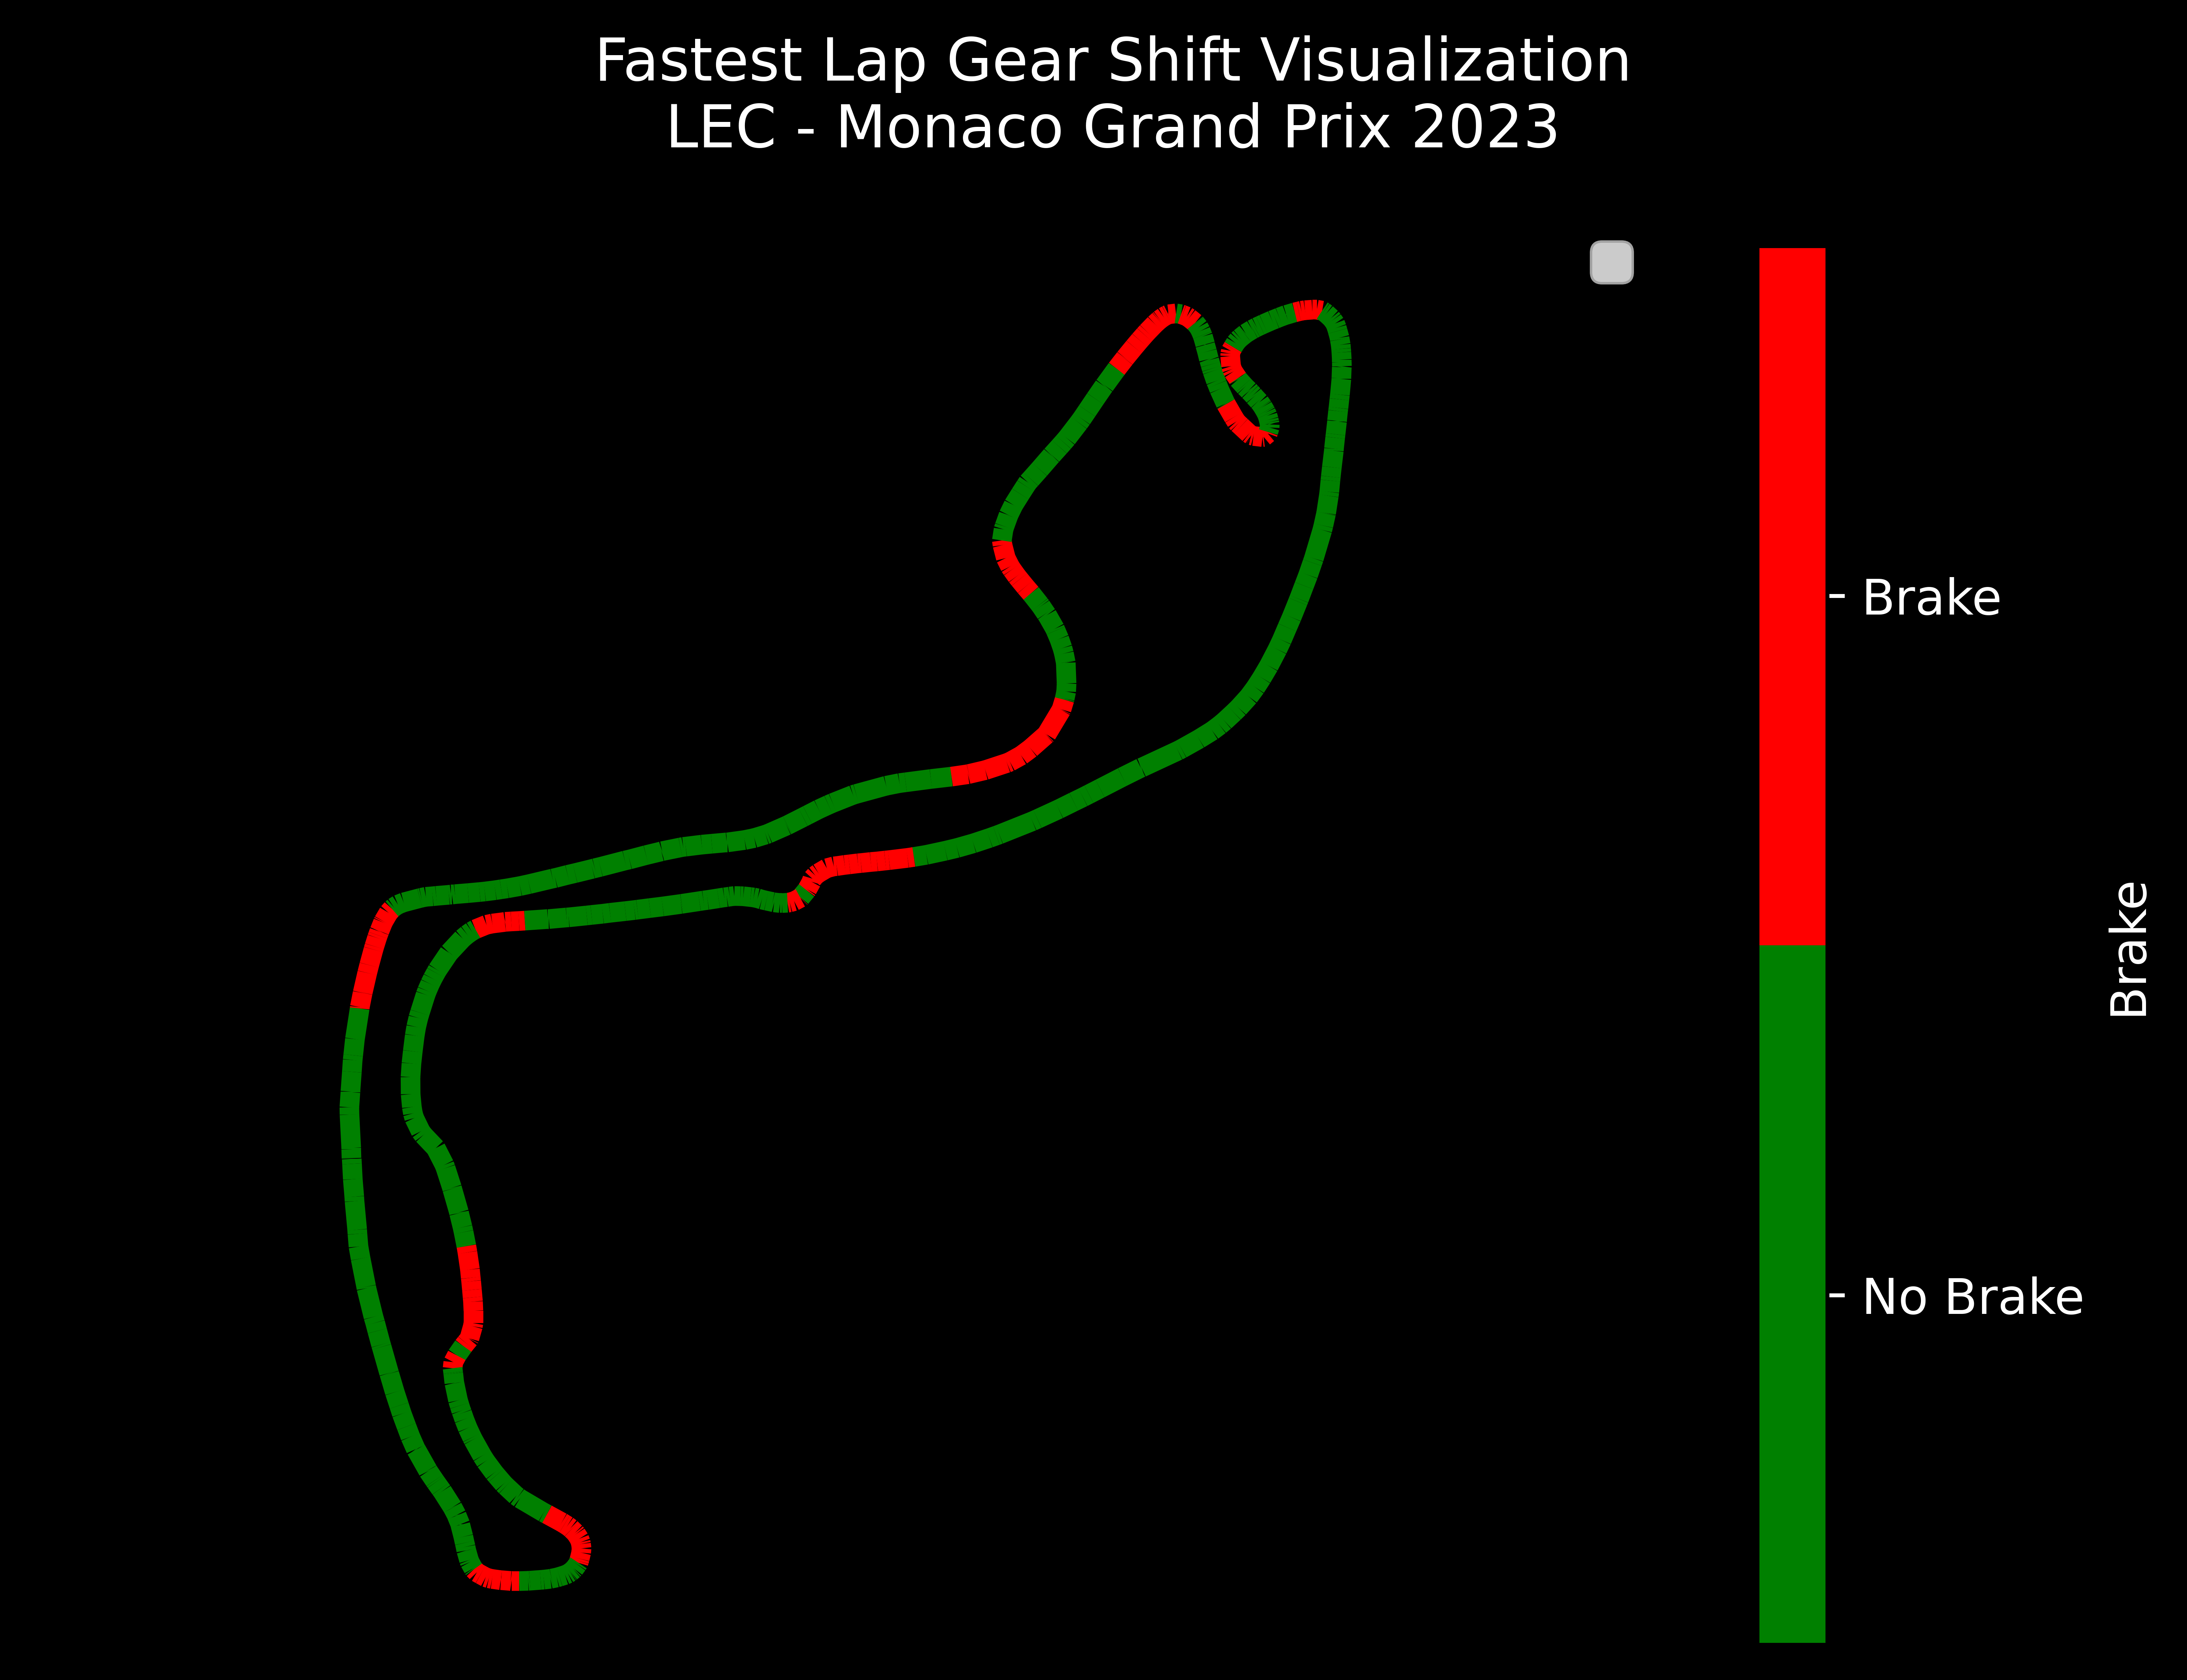

In [12]:
plot_fastest_lap_brake_visualization(["VER", "LEC"], year, race)